In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx
import re

In [2]:
#import data from csv
edges = pd.read_csv('edges.csv')
nodes = pd.read_csv('nodes.csv')
hero_edges = pd.read_csv('hero-network.csv')
datasets = [edges, nodes, hero_edges]

In [3]:
nodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [4]:
edges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [5]:
#Let's display the number of different nodes (comic/hero)
pd.DataFrame(nodes.type.value_counts())

,type
comic,12651
hero,6439


In [6]:
problem2 = edges[ edges.hero.str.contains('ROGUE /')]
problem2

,hero,comic
67903,ROGUE /,A 10
67904,ROGUE /,A3 10
67905,ROGUE /,A 401
67906,ROGUE /,AF2 9
67907,ROGUE /,AF 33
...,...,...
68225,ROGUE /,XV.A 3
68226,ROGUE /,XV.A 4
68227,ROGUE /,XX 1
68228,ROGUE /,XX 2


In [7]:
problem = hero_edges[ hero_edges.hero2.str.contains('ROGUE')].hero2

In [8]:
problem

140       ROGUE /
148       ROGUE /
155       ROGUE /
161       ROGUE /
280       ROGUE /
           ...   
574451    ROGUE /
574456    ROGUE /
574460    ROGUE /
574463    ROGUE /
574465    ROGUE /
Name: hero2, Length: 3193, dtype: object

- **DATA CLEANING**

In [9]:
# preprocessing
def strip_rightend(string):
    string = string.rstrip()
    sstring = '/'
    if string.endswith(sstring):
        res = re.sub(sstring, '', string)

    if string =='SPIDER-MAN/PETER PAR':
        string = 'SPIDER-MAN/PETER PARKER'

    return string


In [10]:
for ds in datasets:
    ds.dropna(inplace=True)
    for col in ds.columns:
        ds[col].apply(lambda row: strip_rightend(row))

In [11]:
hero_edges_arr = np.array(hero_edges)
hero_edges_arr.shape

(574467, 2)

In [12]:
idx_self = np.where(hero_edges_arr[:,0] == hero_edges_arr[:,1])
idx_self
# we check on a sample
hero_edges.iloc[8889]

hero1    MISS AMERICA/MADELIN
hero2    MISS AMERICA/MADELIN
Name: 8889, dtype: object

In [13]:
hero_edges_arr = np.delete(hero_edges_arr, idx_self, axis = 0)
print(hero_edges_arr.shape)
heroes_df = pd.DataFrame(hero_edges_arr) # ! new df 
heroes_df.columns = ['hero1', 'hero2']

(572235, 2)


In [14]:
#There are not hero in hero_edges whose string ends with '//' 
count=0

for i in hero_edges[['hero2','hero1']]:
        
        if i.endswith(('//')):
            count+=1 
count

0

In [15]:
hero_edges.describe()

,hero1,hero2
count,574467,574467
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8149,8350


In [16]:
hero_edges.groupby(['hero1','hero2']).count()

Empty DataFrame
Columns: []
Index: [(24-HOUR MAN/EMMANUEL, FROST, CARMILLA), (24-HOUR MAN/EMMANUEL, KILLRAVEN/JONATHAN R), (24-HOUR MAN/EMMANUEL, M'SHULLA), (3-D MAN/CHARLES CHAN, ANGEL/WARREN KENNETH), (3-D MAN/CHARLES CHAN, ANT-MAN II/SCOTT HAR), (3-D MAN/CHARLES CHAN, AURORA/JEANNE-MARIE ), (3-D MAN/CHARLES CHAN, BLACK PANTHER/T'CHAL), (3-D MAN/CHARLES CHAN, BLACK WIDOW/NATASHA ), (3-D MAN/CHARLES CHAN, CAGE, LUKE/CARL LUCA), (3-D MAN/CHARLES CHAN, CAPTAIN AMERICA), (3-D MAN/CHARLES CHAN, COLLECTIVE MAN), (3-D MAN/CHARLES CHAN, CRYSTAL [INHUMAN]), (3-D MAN/CHARLES CHAN, CYCLOPS/SCOTT SUMMER), (3-D MAN/CHARLES CHAN, DARKSTAR/LAYNIA SERG), (3-D MAN/CHARLES CHAN, DEFENSOR), (3-D MAN/CHARLES CHAN, DR. DRUID/ANTHONY LU), (3-D MAN/CHARLES CHAN, DR. STRANGE/STEPHEN ), (3-D MAN/CHARLES CHAN, GORILLA-MAN), (3-D MAN/CHARLES CHAN, HAWK), (3-D MAN/CHARLES CHAN, HUMAN ROBOT), (3-D MAN/CHARLES CHAN, IGOR), (3-D MAN/CHARLES CHAN, IKARIS/IKE HARRIS [E), (3-D MAN/CHARLES CHAN, INVISIBLE WOMAN/SUE ), (3-D MAN/CHARLES CHAN, JACK OF HEARTS/JACK ), (3-D MAN/CHARLES CHAN, JONES, RICHARD MILHO), (3-D MAN/CHARLES CHAN, KARNAK [INHUMAN]), (3-D MAN/CHARLES CHAN, LOBO), (3-D MAN/CHARLES CHAN, LOCKJAW [INHUMAN]), (3-D MAN/CHARLES CHAN, MARVEL BOY III/ROBER), (3-D MAN/CHARLES CHAN, MIKHLO), (3-D MAN/CHARLES CHAN, MOCKINGBIRD/DR. BARB), (3-D MAN/CHARLES CHAN, NORRISS, SISTER BARB), (3-D MAN/CHARLES CHAN, PHARAOH RAMA-TUT), (3-D MAN/CHARLES CHAN, PROFESSOR X/CHARLES ), (3-D MAN/CHARLES CHAN, QUICKSILVER/PIETRO M), (3-D MAN/CHARLES CHAN, SABRA/RUTH BAT-SERAP), (3-D MAN/CHARLES CHAN, SASQUATCH/WALTER LAN), (3-D MAN/CHARLES CHAN, SCARLET WITCH/WANDA ), (3-D MAN/CHARLES CHAN, SHADOWCAT/KATHERINE ), (3-D MAN/CHARLES CHAN, SHE-HULK/JENNIFER WA), (3-D MAN/CHARLES CHAN, SHROUD/MAXIMILLIAN Q), (3-D MAN/CHARLES CHAN, SLOAN, FRED), (3-D MAN/CHARLES CHAN, THING/BENJAMIN J. GR), (3-D MAN/CHARLES CHAN, TORPEDO III/BROCK JO), (3-D MAN/CHARLES CHAN, URSA MAJOR/MIKHAIL U), (3-D MAN/CHARLES CHAN, VENUS II), (3-D MAN/CHARLES CHAN, WHIZZER/ROBERT L. FR), (4-D MAN/MERCURIO, BALDER [ASGARDIAN]), (4-D MAN/MERCURIO, BALLANTINE, KAYLA), (4-D MAN/MERCURIO, CAPTAIN AMERICA), (4-D MAN/MERCURIO, CAPTAIN MARVEL/CAPTA), (4-D MAN/MERCURIO, DEMONSTAFF), (4-D MAN/MERCURIO, DRAGONFLY/VERONICA D), (4-D MAN/MERCURIO, EON), (4-D MAN/MERCURIO, FANDRAL [ASGARDIAN]), (4-D MAN/MERCURIO, FERRARI, CONNIE), (4-D MAN/MERCURIO, FURY, COL. NICHOLAS ), (4-D MAN/MERCURIO, GRANT, SILAS), (4-D MAN/MERCURIO, GREY GARGOYLE/PAUL P), (4-D MAN/MERCURIO, HEIMDALL [ASGARDIAN]), (4-D MAN/MERCURIO, HILDEGARDE [ASGARDIA), (4-D MAN/MERCURIO, HOGUN [ASGARDIAN]), (4-D MAN/MERCURIO, IRON MAN/TONY STARK ), (4-D MAN/MERCURIO, JAMESON, J. JONAH), (4-D MAN/MERCURIO, KARNILLA [ASGARDIAN]), (4-D MAN/MERCURIO, LOKI [ASGARDIAN]), (4-D MAN/MERCURIO, MOONDRAGON/HEATHER D), (4-D MAN/MERCURIO, ODIN [ASGARDIAN]), (4-D MAN/MERCURIO, OVERMIND/GROM), (4-D MAN/MERCURIO, SIF), (4-D MAN/MERCURIO, STRANGER), (4-D MAN/MERCURIO, TANA NILE), (4-D MAN/MERCURIO, THOR IV/DARGO), (4-D MAN/MERCURIO, THOR/DR. DONALD BLAK), (4-D MAN/MERCURIO, TYRUS), (4-D MAN/MERCURIO, VOLSTAGG), (4-D MAN/MERCURIO, ZARRKO, ARTHUR), (8-BALL/, BAYLOR, FRANK), (8-BALL/, CONOVER, ALYSSA), (8-BALL/, MCMURRAY, YVONNE), (8-BALL/, RAMBO), (8-BALL/, SHERIDAN, RICHARD RI), (8-BALL/, SLEEPWALKER), (A, BLOK), (A, MR. X), (A, NIGHTCRAWLER/KURT WA), (A, ROGUE /), (A, SABRETOOTH/VICTOR CR), (A, T), (A'YIN, BARAK), (A'YIN, CAPTAIN BRITAIN/BRIA), (A'YIN, COLOSSUS II/PETER RA), (A'YIN, MEGGAN), (A'YIN, NIGHTCRAWLER/KURT WA), (A'YIN, RA'AL), (A'YIN, SHADOWCAT/KATHERINE ), (A'YIN, SPIRAL), (A'YIN, WISDOM, PETER), (A'YIN, WOLFSBANE/RAHNE SINC), (A'YIN, XIANDU), ...]

[224181 rows x 0 columns]

- *FIRST GRAPH*

In [17]:
edge = [(row["hero1"], row["hero2"]) for index, row in hero_edges.iterrows()]

In [18]:
First_G = nx.Graph()
First_G.add_edges_from(edge)

In [19]:
len(list(set(First_G.edges())))

167219

In [20]:
set(First_G.nodes())

{'CLINTON, BILL',
 'FIREFIST II/',
 'ISAAC',
 'POPEYE',
 'RIFKIN, MARJORIE',
 'HOBGOBLIN V/JASON PH',
 'JONES, JOHN',
 'PUMA/THOMAS FIREHEAR',
 'PROVENZANO, PAULIE',
 'PURL, DR. NOAH',
 'DWORMAN, JIM',
 'ANSWER',
 'FLAME',
 'VON FRANKENSTEIN, BA',
 'MASTERMIND IV/MARTIN',
 'CEREBRITE BETA',
 'COMANCHE',
 'GREICO, LINDA',
 'RAZORBLADE/',
 'EEL III',
 'RAGA-SHAH',
 'BLACK BOLT | MUTANT ',
 'RANDEAU, DR.',
 'CIRE, EZRA',
 'CHI DEMON/PROFESSOR ',
 'ISLEY, LYNN',
 'MALTESE',
 'STILETTO II/',
 'ELECTRO/MAX DILLON',
 'BLOODSTRIKE/ERIC CON',
 'STINGRAY | MUTANT X-',
 'GENECIDE',
 'TAL, GENERAL',
 'AEGIS/TREY ROLLINS',
 'CYTTORAK',
 'BURKE, JOB',
 'CHANGELING',
 'OZYMANDIAS',
 'WIDGET',
 'MERENGUES, SMOOTH MA',
 'NITAL, DR.',
 'JORDAN, HAL',
 'LUBENSKI, NATE',
 'HENDERSHOOT, COLONEL',
 'LANCER/SAMANTHA DUNB',
 'TRACKER',
 'TUATARA/COMMANDER AR',
 'BRADDOCK, JAMES JR. ',
 'WATANABE, YUJI',
 'JYX',
 'AIREO/AEOLUS [INHUMA',
 'SPIDERCIDE',
 'M-PLATE',
 'MASTER KHAN/TYRONE K',
 'QUORUM/',
 'SNIPES, 

In [21]:
(list(First_G.degree()))

[('LITTLE, ABNER', 22),
 ('PRINCESS ZANDA', 11),
 ("BLACK PANTHER/T'CHAL", 711),
 ('STEELE, SIMON/WOLFGA', 9),
 ('FORTUNE, DOMINIC', 15),
 ('ERWIN, CLYTEMNESTRA', 61),
 ('IRON MAN/TONY STARK ', 1522),
 ('IRON MAN IV/JAMES R.', 465),
 ('RAVEN, SABBATH II/EL', 11),
 ('CARNIVORE/COUNT ANDR', 45),
 ('GHOST', 35),
 ('ZIMMER, ABE', 72),
 ('FU MANCHU', 42),
 ('TARR, BLACK JACK', 30),
 ('SMITH, SIR DENIS NAY', 28),
 ('SHANG-CHI', 127),
 ('STARSHINE II/BRANDY ', 166),
 ('ROM, SPACEKNIGHT', 241),
 ('MAN-THING/THEODORE T', 188),
 ('WU, LEIKO', 44),
 ('DOCTOR DREDD', 14),
 ('RESTON, CLIVE', 32),
 ('JACKSON, STEVE', 71),
 ('MYSTIQUE/RAVEN DARKH', 395),
 ('BLOB/FRED J. DUKES', 423),
 ('TORPEDO III/BROCK JO', 224),
 ('PYRO/ALLERDYCE JOHNN', 298),
 ('AVALANCHE/DOMINIC PE', 277),
 ('ROGUE /', 831),
 ('DESTINY II/IRENE ADL', 228),
 ('HYBRID/JAMES JIMMY M', 30),
 ('CLARK, SARAH', 53),
 ('KILLBURN, MACK', 17),
 ('JONES, TAMMY ANNE', 52),
 ('JONES, LORRAINE LORR', 52),
 ('JONES, NELL', 46),
 ('JONES, DANIE

In [22]:
nx.info(First_G)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3508\2426280292.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(First_G)


'Graph with 6426 nodes and 167219 edges'

In [23]:
nx.density(First_G) #very sparse graph

0.00810031232553549

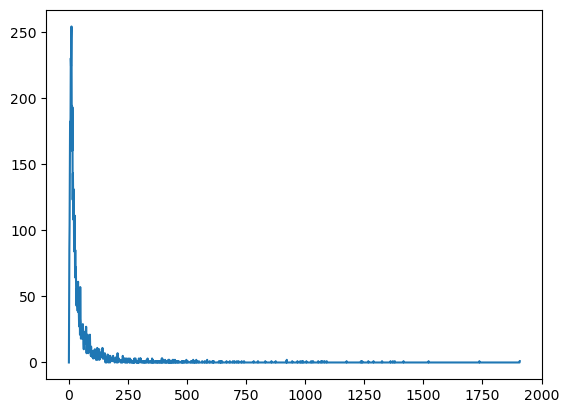

In [24]:
plt.plot(nx.degree_histogram(First_G))

In [25]:
nx.degree_centrality(First_G)
pd.DataFrame.from_dict(nx.betweenness_centrality(First_G,k= 10), orient='index', columns=['betweenness']).sort_values(by='betweenness', ascending=False).head(10)

,betweenness
CAPTAIN AMERICA,0.082086
SPIDER-MAN/PETER PAR,0.066349
IRON MAN/TONY STARK,0.057350
SUB-MARINER/NAMOR MA,0.049320
HAWK,0.045424
DAREDEVIL/MATT MURDO,0.039886
CYCLOPS/SCOTT SUMMER,0.032857
"JAMESON, J. JONAH",0.031281
THOR/DR. DONALD BLAK,0.030025
MARVEL GIRL/JEAN GRE,0.028784


In [26]:
# create weighted graph from First_G
Graph_1 = nx.Graph()
#iterate on all the edges of the graph
for u,v in First_G.edges:
    if Graph_1.has_edge(u,v):
        Graph_1[u][v]['weight'] += 1
    else:
        Graph_1.add_edge(u, v, weight=1)
        
#reciprocal of the weights of the graph, in order to have lower cost for heroes with more collaborations.
for u,v in Graph_1.edges:
    Graph_1[u][v]['weight']=1/Graph_1[u][v]['weight']

In [27]:
nx.is_weighted(Graph_1)

True

In [28]:
#second Graph
node_data = list(zip(nodes.node, [{'type':t}for t in nodes.type]))
edge_data = list(zip(edges.hero, edges.comic))


In [29]:
# modify edge data to be only included if nodes also in node_data

edge_arr = np.array(edge_data)
#print(edge_arr.shape)
node_list = list(nodes.node)

tbd = []

for i in range(len(edge_arr)):
    a, b = edge_arr[i,0], edge_arr[i,1]
    if a not in node_list or b not in node_list:
        tbd.append(i)

edge_arr = np.delete(edge_arr, tbd, axis = 0)
print(edge_arr.shape)

edge_data = [(e[0], e[1])for e in edge_arr.tolist()]  # again format of list of tuples

##########

Second_G = nx.Graph()
Second_G.add_nodes_from(node_data)
Second_G.add_edges_from(edge_data)

(94527, 2)


FUNCTIONALITY 1



Output:

- The number of nodes in the network (if type 2, report for both node types)

- The number of collaborations of each superhero with the others (only if type 1)

- The number of heroes that have appeared in each comic (only if type 2)

- The network's density

- The network's degree distribution

- The average degree of the network

- The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
Whether the Network is sparse or dense

In [30]:
# making list of top_n sorted heroes
top = edges.groupby(by = 'hero')['comic'].count().sort_values(ascending=False).reset_index().head(10)
top

,hero,comic
0,SPIDER-MAN/PETER PARKER,1577
1,CAPTAIN AMERICA,1334
2,IRON MAN/TONY STARK,1150
3,THING/BENJAMIN J. GR,963
4,THOR/DR. DONALD BLAK,956
5,HUMAN TORCH/JOHNNY S,886
6,MR. FANTASTIC/REED R,854
7,HULK/DR. ROBERT BRUC,835
8,WOLVERINE/LOGAN,819
9,INVISIBLE WOMAN/SUE,762


In [31]:
#build a function to extract the nodes that are not in the top N

def Remove_Not_TopN(graph,N):
    #build the first part of the function to extract the nodes(heroes) that are not in the top N

    top = edges.groupby(by = 'hero')['comic'].count().sort_values(ascending=False).index
    not_top_heroes = list(top[N:])
    
    #let's copy our graph in order to remove the heroes(node) that are not in top N 

    graph=graph.copy()
    graph.remove_nodes_from(not_top_heroes) 
    return(graph)

#check 
graph_without_notTopN= Remove_Not_TopN(First_G,100) 
nx.info(graph_without_notTopN)
nx.density(graph_without_notTopN) #still sparse graph 

C:\Users\Admin\AppData\Local\Temp\ipykernel_3508\3708851531.py:17: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(graph_without_notTopN)


0.25487819658223243

In [32]:
#1)     #The number of nodes in the network (if type 2, report for both node types)
def n_nodes_N(graph,type_):  
    if type_== 1:
        print('the number of nodes of the First graph is '+ str(graph.number_of_nodes()))

    elif type_==2:

        comic=[x for x in graph.nodes if graph.nodes[x]['type']=='comic']
        print('the number of hero-nodes is '+ str(len(comic)))
        hereos=[x for x in graph.nodes if graph.nodes[x]['type']=='hero']
        print('the number of comic-nodes is '+ str(len(hereos)))

#check
n_nodes_N(Second_G,2)

the number of hero-nodes is 12651
the number of comic-nodes is 6439


In [106]:
#2) The number of collaborations of each hero with the others 

def collaborations(graph,type_):
    if type_ == 1:
        collabor=dict(graph.degree())
        collab=dict(sorted(collabor.items(),key=lambda x: -x[1]))
    #let's print just the first 25 pairs of the dictionary:
        count = 0
        for key, value in collab.items():
            print(f'{key}: {value}')
            count += 1
            if count >= 25:
                break
#check
#collaborations(First_G,1)                    
                
#3) this request can be interpreted as find the degree of each 'comic'-node 
def hero_appearance(graph,type_):
    #dictionary comprehension 
    if  type_==2:
        comic={x: graph.degree[x] for x in graph.nodes if graph.nodes[x]['type']=='comic'}
        comic
        # sort the dictionary by values and store the result as a dataframe
        sort_dict = sorted(comic.items(), key=lambda x: -x[1])
        top25_comic_degree= pd.DataFrame(sort_dict).head(25)

    return(top25_comic_degree.rename(columns={0: 'Comic', 1: 'Degree'}))
#check
#hero_appearance(Second_G,2) #top 10 hero appereance in a comic



#construct a function to call one of the previous two depending on the type of graph given as input
def collaborations_appearances(graph,type_):
    if type_==1:
        collaborations(graph,1)
    elif type_==2:
        print(hero_appearance(graph,2))
        

In [108]:
collaborations_appearances(Second_G,2)

       Comic  Degree
0      COC 1     110
1       IW 3      90
2       IW 1      89
3     H2 279      86
4       IW 4      80
5       IW 2      75
6   MAXSEC 3      71
7     FF 370      62
8       IW 6      60
9     FF 369      59
10    M/GN 1      59
11     TB 25      59
12      A3 1      55
13    FF 368      55
14      FF 3      55
15      IW 5      55
16    MK3 41      54
17    H2 278      52
18    SWII 9      52
19   X:PRIME      52
20    FF 367      50
21      IG 2      49
22    MX '01      49
23      Q 38      49
24    WM2 13      49


In [35]:
#4) density of the graph

def density(graph):
    dens = nx.density(graph)
    return ('The Density of the graph is ' + str(round(dens,4)))

#check
density(First_G)

'The Density of the graph is 0.0081'

In [36]:
#5) EXTRACT NETWORK'S DEGREE DISTRIBUTION

#To extract the degree distribution of the graph we have to iterate through all the nodes and count 
#for each node its number of edges(degree), then we will use the degree as the key and the number of 
#nodes with that degree as the value in the dictionary

def degree_distribution(graph):
    degree_count={}
    for node in graph.nodes():
        degree=graph.degree(node)
        if degree not in degree_count:  #if the degree of the node it's not even encountred before assign 1
            degree_count[degree] = 1
        else:
            degree_count[degree] += 1 #if the degree has already been encountered, increment the value by 1.
            
    return degree_count #degree distribution

#claim that in this dict we have as key the various degrees of node and as values the number of nodes that have that degree


In [37]:
#6)  # Calculate the average degree of the graph
def avg_G(graph):
    average_degree = sum(d for n, d in graph.degree()) / graph.number_of_nodes()
    return("Average degree of the graph: "+str(round(average_degree,3)))
avg_G(First_G)    

'Average degree of the graph: 52.045'

In [38]:
#7) 
def HUBS(graph):
    #Calculate the 95th percentile of the degree distribution. To do this, 
    #first sort the degrees in ascending order and then find the degree at the 95th percentile:
    degrees=dict(graph.degree())
    sorted_degrees=sorted(degrees.values())
    #95th_percentile
    perc_95 = sorted_degrees[int(len(sorted_degrees) * 0.95)]
    #Find the nodes with degrees greater than the 95th percentile with a loop
    hubs = [node for node, degree in degrees.items() if degree > perc_95]
    hubs= pd.DataFrame(hubs).rename(columns={0:'Hubs'})
    return(hubs)

In [39]:
#8)
def kind_G(graph):
    #sparsity of the graph, we take as trashold 0.5 value of the density of the graph
    density=nx.density(graph)
    if density>=0.5:
        print('The graph is dense')
    else:
        print('The graph is sparse')

In [40]:
#Recall all the functions 

In [110]:
#extract features from the graph


#build a function to extract the nodes that are not in the top N

def Remove_Not_TopN(graph,N):
    #build the first part of the function to extract the nodes(heroes) that are not in the top N

    top = edges.groupby(by = 'hero')['comic'].count().sort_values(ascending=False).index
    not_top_heroes = list(top[N:])
    
    #let's copy our graph in order to remove the heroes(node) that are not in top N 

    graph=graph.copy()
    graph.remove_nodes_from(not_top_heroes) 
    return(graph)
    




def G_feat(graph_,type_, N):
    
    #takes N heroes with the above function
    graph=Remove_Not_TopN(graph_,N)
    
    n_nodes_N(graph,type_)
    
    collaborations_appearances(graph,type_)
    
    density(graph)
    
    degree_distribution(graph)
    
    avg_G(graph)
    
    HUBS(graph)
    
    kind_G(graph)
    
    
G_feat(First_G,1,5)   

the number of nodes of the First graph is 147
CAPTAIN AMERICA: 82
THING/BENJAMIN J. GR: 68
SPIDER-MAN/PETER PAR: 64
SCARLET WITCH/WANDA : 63
VISION : 63
THOR/DR. DONALD BLAK: 63
IRON MAN/TONY STARK : 62
WOLVERINE/LOGAN : 62
INVISIBLE WOMAN/SUE : 62
PROFESSOR X/CHARLES : 55
WASP/JANET VAN DYNE : 54
HAVOK/ALEX SUMMERS : 54
BLACK WIDOW/NATASHA : 54
ICEMAN/ROBERT BOBBY : 52
JARVIS, EDWIN : 52
DR. STRANGE/STEPHEN : 51
BLACK KNIGHT V/DANE : 50
FURY, COL. NICHOLAS : 49
SHADOWCAT/KATHERINE : 42
WATSON-PARKER, MARY : 38
DR. DOOM/VICTOR VON : 38
GAMBIT/REMY LEBEAU : 38
MAGNETO/MAGNUS/ERIC : 35
NORTHSTAR/JEAN-PAUL : 34
ROSS, GEN. THADDEUS : 33
The graph is sparse


**VISUALIZATION 1- Visualize some features of the network**

In [44]:
#1)
from tabulate import tabulate

#A table containing general information about the graph

def make_table(graph):
    
    # Create a list of lists representing the rows of the table
    n_nodes=graph.number_of_nodes()
    density=nx.density(graph)
    avg= sum(d for n, d in graph.degree()) / graph.number_of_nodes()
    
    kind=[]
    if density>=0.5:
        kind='dense'
    else:
        kind='sparse'
    
    
    rows = [    [n_nodes,density,avg,kind]  ]

    # Create a list of strings representing the column names
    columns = ["N.Nodes", "Density", "AVG_degree","Kind_Graph"]

    # Print the table
    print(tabulate(rows, headers=columns))

In [45]:
#check
make_table(Second_G)

  N.Nodes      Density    AVG_degree  Kind_Graph
---------  -----------  ------------  ------------
    19090  0.000518796        9.9033  sparse


In [62]:
#2)

def table_hubs(graph,N):
    hub=HUBS(graph)
    #hub=pd.DataFrame(hubs).rename(columns={0:'Hubs'})
    
    return(hub)
    

In [64]:
table_hubs(First_G,1)

,Hubs
0,BLACK PANTHER/T'CHAL
1,IRON MAN/TONY STARK
2,IRON MAN IV/JAMES R.
3,"ROM, SPACEKNIGHT"
4,MYSTIQUE/RAVEN DARKH
...,...
315,AJAK/TECUMOTZIN [ETE
316,SILHOUETTE
317,"MADDICKS, ARTHUR ART"
318,CHAMBER/JONOTHON STA


In [48]:
graph=First_G
degrees = graph.degree()
# convert the degree view object to a dictionary
degrees_dict = dict(degrees)
# sort the dictionary by descending order
sorted_degrees = sorted(degrees_dict.items(), key=lambda x: -x[1])  
top_25 = sorted_degrees[:25]
top_25

[('CAPTAIN AMERICA', 1908),
 ('SPIDER-MAN/PETER PAR', 1737),
 ('IRON MAN/TONY STARK ', 1522),
 ('THING/BENJAMIN J. GR', 1416),
 ('MR. FANTASTIC/REED R', 1379),
 ('WOLVERINE/LOGAN ', 1371),
 ('HUMAN TORCH/JOHNNY S', 1361),
 ('SCARLET WITCH/WANDA ', 1325),
 ('THOR/DR. DONALD BLAK', 1289),
 ('BEAST/HENRY &HANK& P', 1267),
 ('VISION ', 1241),
 ('INVISIBLE WOMAN/SUE ', 1236),
 ('HAWK', 1175),
 ('WASP/JANET VAN DYNE ', 1091),
 ('ANT-MAN/DR. HENRY J.', 1082),
 ('CYCLOPS/SCOTT SUMMER', 1081),
 ('ANGEL/WARREN KENNETH', 1073),
 ('STORM/ORORO MUNROE S', 1072),
 ('SHE-HULK/JENNIFER WA', 1071),
 ('DR. STRANGE/STEPHEN ', 1067),
 ('HULK/DR. ROBERT BRUC', 1055),
 ('WONDER MAN/SIMON WIL', 1033),
 ('PROFESSOR X/CHARLES ', 1032),
 ('COLOSSUS II/PETER RA', 1025),
 ('MARVEL GIRL/JEAN GRE', 1005)]

In [49]:
#3)
#In order to have a better visualization we will show just the first 25 observation (in this case number of collaborations of each hero)

def depicting_collaborations(graph,type_): 
    if type_ == 1:
        # get the degree view object of the graph
        degrees = graph.degree()
        # convert the degree view object to a dictionary
        degrees_dict = dict(degrees)
        # sort the dictionary by descending order
        sorted_degrees = sorted(degrees_dict.items(), key=lambda x: -x[1])  
        top_25 = sorted_degrees[:25]
        
        keys, values = zip(*top_25)

        # Create the histogram
        plt.bar(keys,values,edgecolor='black',color='lightblue')

        # Add a title and labels for the x and y axes
        plt.title('Number of collaborations of each hero')
        plt.xlabel('Hereos')
        plt.ylabel('Number of Collaborations')
        
        # Rotate the x-axis tick labels 90 degrees in order to be alble to see the hero names
        plt.xticks(rotation=90)

        plt.show()

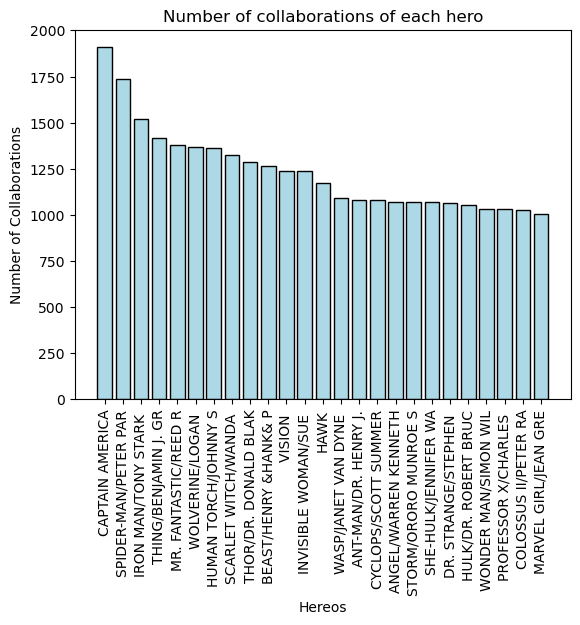

In [50]:
depicting_collaborations(First_G,1)

In [51]:
#4)

def depicting_heroes_in_comic(graph,type_): 
    if type_==2:
        comic={x: graph.degree[x] for x in graph.nodes if graph.nodes[x]['type']=='comic'}
        # sort the dictionary by values and store the result as a dataframe
        sort_dict = sorted(comic.items(), key=lambda x: -x[1])
        top25_comic= sort_dict[:25]
        #Extract the keys and values into separate lists
        keys, values = zip(*top25_comic)

        # Create the histogram
        plt.bar(keys,values,edgecolor='black',color='lightblue')

        # Add a title and labels for the x and y axes
        plt.title('Hereos apparitions for each comic')
        plt.xlabel('Comic')
        plt.ylabel('Number of Heroes in the comic')

        # Rotate the x-axis tick labels 90 degrees in order to be alble to see the 'comic_code'
        plt.xticks(rotation=90)

        plt.show()

      

        

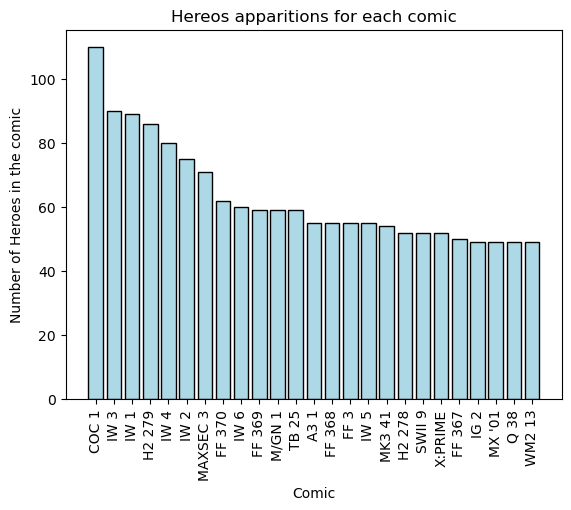

In [52]:
depicting_heroes_in_comic(Second_G,2)

In [65]:
#5) degree distribution of the network
#visualize the dict sorted by its keys (degree of the nodes)

def depicting_distr_netw(graph):
    distribution=degree_distribution(graph)
    sort_distribution = dict(sorted(distribution.items(), key=lambda x: x[0]))

    #and let's visualize it with a suitable plot

    degrees, counts = zip(*sort_distribution.items())

    # Plot the histogram
    plt.bar(degrees, counts, width=1,color='lightblue')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title('Degree Distribution')

    plt.show()

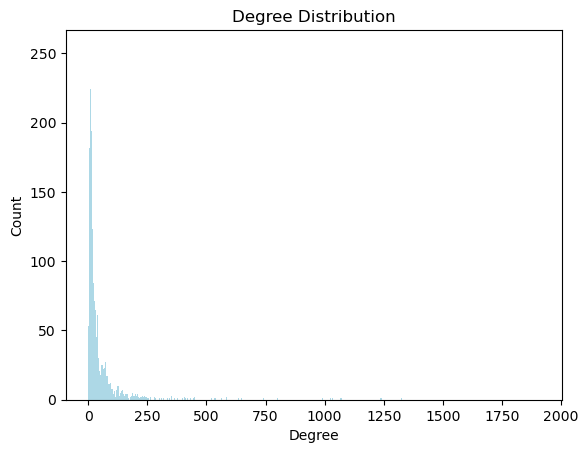

In [66]:
depicting_distr_netw(First_G)